In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\penguins_size_decition_tree_classifier.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.size

2408

In [5]:
df.shape

(344, 7)

In [6]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [8]:
df.sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [9]:
df.sex.value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [10]:
continious = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

In [11]:
df[continious].describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

<Axes: >

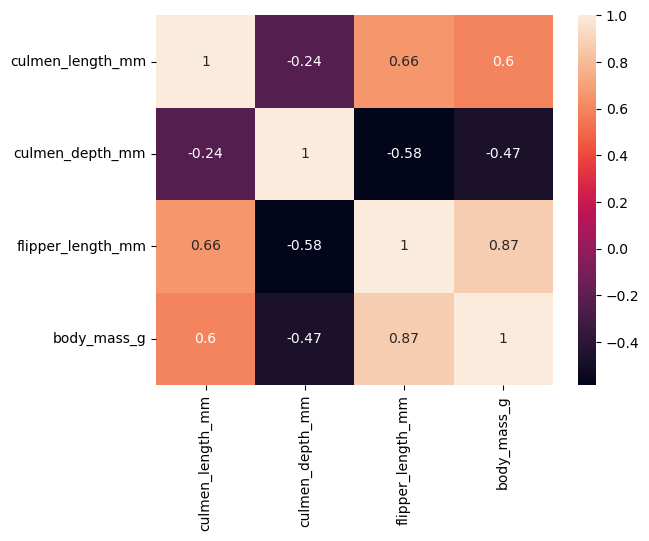

In [12]:
sns.heatmap(df[continious].corr(),annot = True)

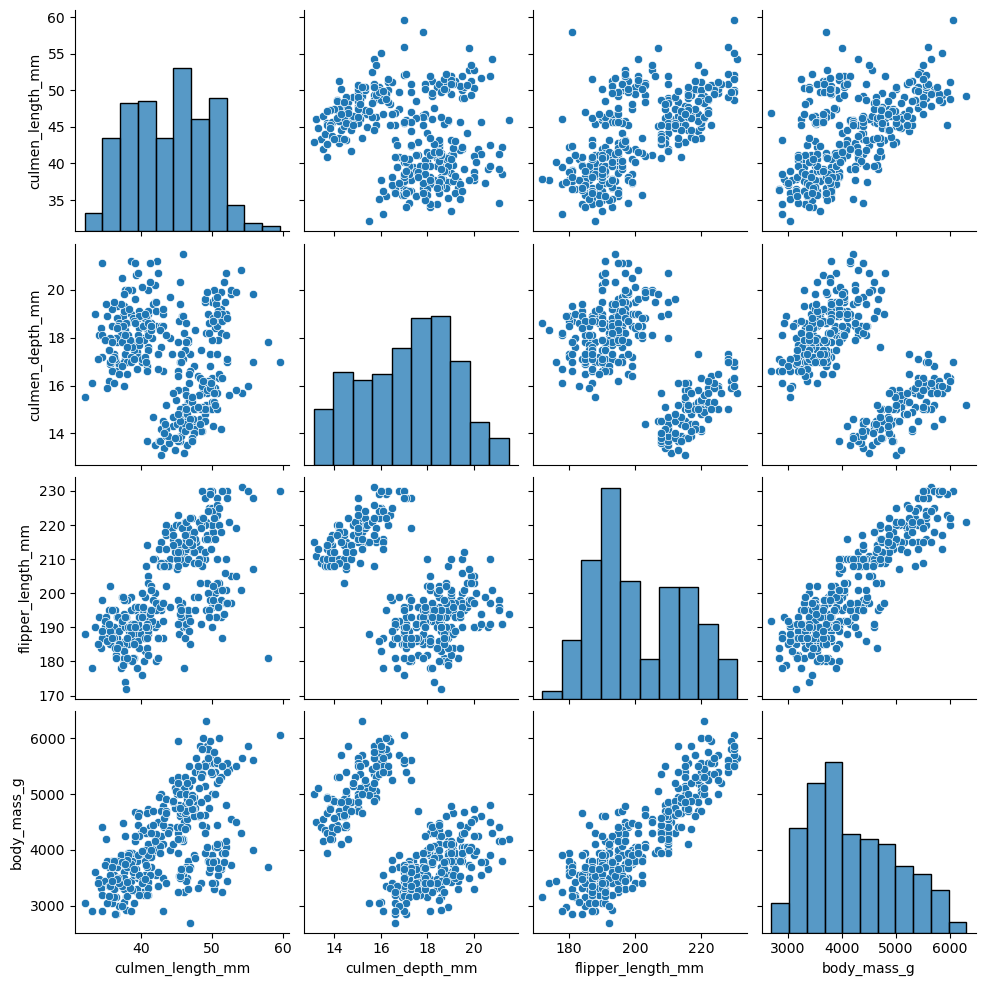

In [13]:
sns.pairplot(df[continious])
plt.show()

In [14]:
df[continious].skew()

culmen_length_mm     0.053118
culmen_depth_mm     -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

## Data preprocessing

In [15]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [16]:
df.sex.replace('.',df.sex.mode()[0],inplace = True)

In [17]:
df.culmen_length_mm.fillna(df.culmen_length_mm.mean(),inplace = True)
df.culmen_depth_mm.fillna(df.culmen_depth_mm.mean(),inplace = True)
df.flipper_length_mm.fillna(df.flipper_length_mm.mean(),inplace = True)
df.body_mass_g.fillna(df.body_mass_g.mean(),inplace = True)

In [18]:
df.sex.fillna(df.sex.mode()[0],inplace = True)

In [19]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
df.duplicated().sum()

0

### Encoding

### Ordinal & Nominal Encoding

* onehot incoding and dummy incoding is same only difference one is use pandas and other one use sklearn
* in the ordinal encoding we do the ordering netween the category
* in the nominal encoding we create saparate columns for each categroy and also drop one columns
* dummy use for nominal data
* ordinalEncoder use for ordinal data 

In [21]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          39.10000         18.70000         181.000000   
1  Adelie  Torgersen          39.50000         17.40000         186.000000   
2  Adelie  Torgersen          40.30000         18.00000         195.000000   
3  Adelie  Torgersen          43.92193         17.15117         200.915205   
4  Adelie  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    MALE  
1  3800.000000  FEMALE  
2  3250.000000  FEMALE  
3  4201.754386    MALE  
4  3450.000000  FEMALE

In [22]:
inp = df.drop(columns = 'species')
inp.head(2)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen              39.1             18.7              181.0   
1  Torgersen              39.5             17.4              186.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE

In [23]:
X = pd.get_dummies(inp,columns = ['island','sex'],drop_first = True).astype(int) 
y = df['species']

In [24]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [25]:
X_train,X_test,y_train,y_test  = train_test_split(X,y , random_state = 9 , test_size = 0.2)

# Modelling

**if any overfitting oproblem we will do pruning**

### Hyper parameter tunning 

In [26]:
estimator = DecisionTreeClassifier(random_state = 0)

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 3, 4, 5, 6]}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [27]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=0)

### Feature importence 

In [28]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_,
                   columns = ['Feature Importances'],
                   index = X_train.columns.to_list())
s1[s1['Feature Importances']>0].index.to_list()                                                                                                           

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'island_Dream']

In [29]:
grid.best_estimator_.feature_importances_

array([0.34191221, 0.01787409, 0.59789894, 0.        , 0.04231476,
       0.        , 0.        ])

In [30]:
features = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                       index = X.columns,columns = ['Importance'])
features.head()

Importance
culmen_length_mm     0.341912
culmen_depth_mm      0.017874
flipper_length_mm    0.597899
body_mass_g          0.000000
island_Dream         0.042315

In [31]:
imp_features = features[features['Importance']>0].index.tolist()
imp_features

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'island_Dream']

In [32]:
X_imp = X[imp_features]

In [33]:
X_train,X_test,y_train,y_test  = train_test_split(X_imp,y , random_state = 9 , test_size = 0.2)

# Final decision Treee model with best hyp and imp columns

In [34]:
# model with best hyperparameter 
final_dt_model = dt_default = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state = 0)
final_dt_model.fit(X_train,y_train)

y_pred_train = final_dt_model.predict(X_train)
y_pred_test = final_dt_model.predict(X_test)

print('train aaccuracy',accuracy_score(y_train,y_pred_train))
print('test accuracy is :', accuracy_score(y_test,y_pred_test))
print('cross validation score is :',cross_val_score(final_dt_model,X_train,y_train,cv = 5).mean())

train aaccuracy 0.9781818181818182
test accuracy is : 0.9565217391304348
cross validation score is : 0.970909090909091


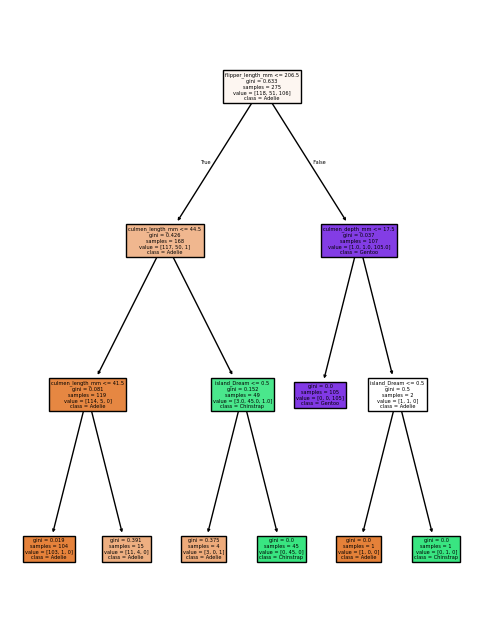

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize = (6,8))
plot_tree(
    dt_default,
    filled=True,
    feature_names=X_train.columns.to_list(),   
    class_names=['Adelie', 'Chinstrap', 'Gentoo'] 
)
plt.show()

after creating the decition tree model & using this mode we can 
**can identify importent features**

* random_state : use to fix the data without using different data every time 